In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [27]:
df = pd.read_csv('../../datasets/winequality-red.csv') #(,sep='&') para separar datos en el csv por &
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# First experiment

#### -Randomly divide the data into training (70%) and testing (30%) sets

In [28]:
X = df.values[:,:-1]
Y = df.values[:, -1]

print("X shape: ",X.shape,"\nY shape: ",Y.shape)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=0)
print('Xtrain: ',Xtrain.shape)
print('Xtest: ',Ytest.shape)

X shape:  (1599, 11) 
Y shape:  (1599,)
Xtrain:  (1119, 11)
Xtest:  (480,)


#### - Generate three regression models: 

MAE: 0.48712621645928494
MSE: 0.40078036637500924
R2 score: 0.3207112434321877


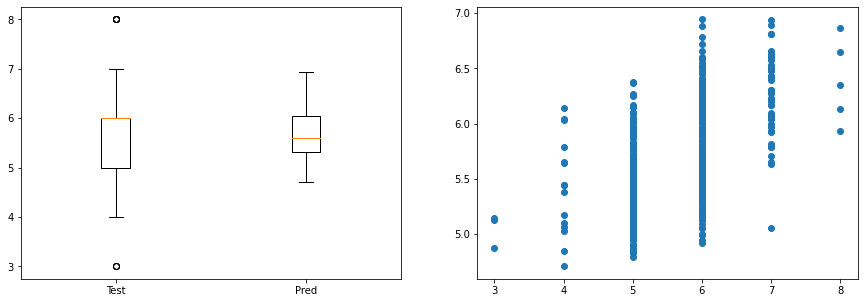

In [29]:
# Lineal Regression
model = LinearRegression()
model.fit(Xtrain,Ytrain)
Ypred = model.predict(Xtest)


print('MAE:',mean_absolute_error(Ytest,Ypred)) #MAE
print('MSE:',mean_squared_error(Ytest,Ypred)) #MSE
print('R2 score:',r2_score(Ytest,Ypred)) #R2 score, coefficient of determination
#Boxplot of quality and scatter plot of real and predicted outputs
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.boxplot([Ytest,Ypred], labels=['Test', 'Pred']) #quality
plt.subplot(1,2,2)
plt.scatter(Ytest,Ypred)
plt.show()

MAE: 0.43652083333333336
MSE: 0.3536022916666666
R2 score: 0.4006740819209039


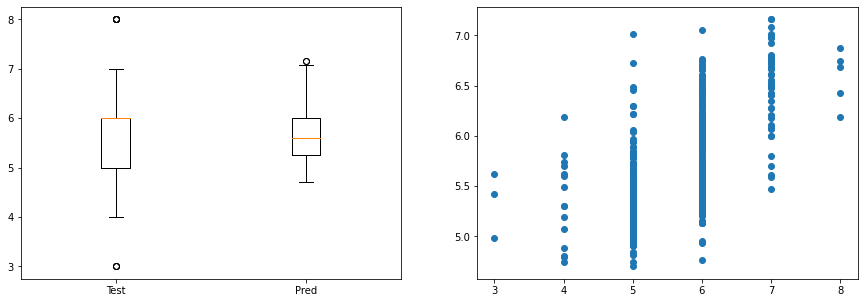

In [30]:
# Random Forest
model = RandomForestRegressor(random_state=0)
model.fit(Xtrain,Ytrain)
Ypred = model.predict(Xtest)

print('MAE:',mean_absolute_error(Ytest,Ypred)) #MAE
print('MSE:',mean_squared_error(Ytest,Ypred)) #MSE
print('R2 score:',r2_score(Ytest,Ypred)) #R2 score, coefficient of determination
#Boxplot of quality and scatter plot of real and predicted outputs
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.boxplot([Ytest,Ypred], labels=['Test', 'Pred']) #quality
plt.subplot(1,2,2)
plt.scatter(Ytest,Ypred)
plt.show()

MAE: 0.5438516464356041
MSE: 0.4550963050367231
R2 score: 0.22865033044623195


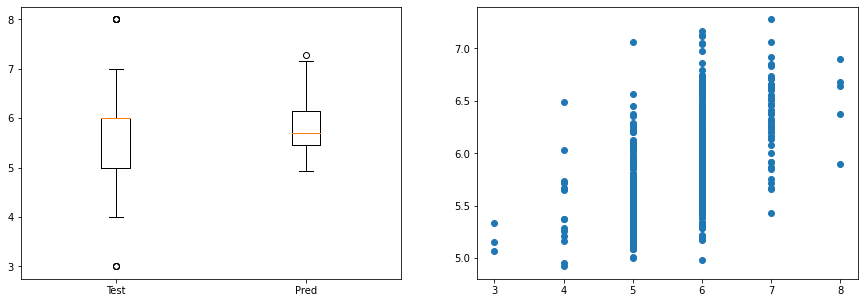

In [31]:
# MultiLayer Perceptron
model = MLPRegressor(random_state=0)
model.fit(Xtrain,Ytrain)
Ypred = model.predict(Xtest)

print('MAE:',mean_absolute_error(Ytest,Ypred)) #MAE
print('MSE:',mean_squared_error(Ytest,Ypred)) #MSE
print('R2 score:',r2_score(Ytest,Ypred)) #R2 score, coefficient of determination
#Boxplot of quality and scatter plot of real and predicted outputs
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.boxplot([Ytest,Ypred], labels=['Test', 'Pred']) #quality
plt.subplot(1,2,2)
plt.scatter(Ytest,Ypred)
plt.show()

# Second Experiment

#### - Randomly divide the data into 5 splits using K-fold

In [32]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)

#### - For each iteration:
    - Create three models: 
        *Linear Regression
        *Random Forest
        *MultiLayer Perceptron
    - Calculate and save for each model the R2 score

In [33]:
resLineal, resRand, resMulti = [],[],[]
for train_idx, test_idx in kf.split(X): #aquí verdaderamente hace split
    Xtrain, Ytrain = X[train_idx,:], Y[train_idx]
    Xtest, Ytest = X[test_idx,:], Y[test_idx]
    #Linear Regression
    model = LinearRegression()
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resLineal.append(r2_score(Ytest,Ypred))
    #Random Forest
    model = RandomForestRegressor(random_state=0)
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resRand.append(r2_score(Ytest,Ypred))
    #MultiLayer Perceptron
    model = MLPRegressor(random_state=0)
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resMulti.append(r2_score(Ytest,Ypred))

#### - Generate a visualization with three boxplots (each one per type of model) showing the values of R2 score

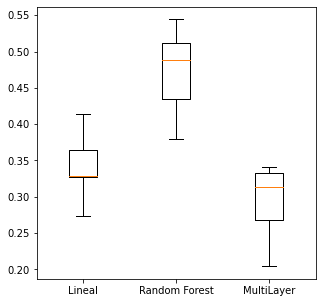

In [34]:
plt.figure(figsize=(5,5))
plt.boxplot([resLineal, resRand, resMulti], labels=['Lineal', 'Random Forest', 'MultiLayer']) #quality
plt.show()

### Finally, write a small paragraph analyzing the results and describing which one is the best model for this kind of data.

 <font size="3"> First of all, we need to see that this kind of data is numerical.</font> 
 
 <font size="3"> We can see that as the data type is numerical, the results are not that good. For example, the mean error in both (mean absolute and mean square) is kind of high (this in the three models)</font> 
 
  <font size="3"> Despite this, we can clearly see that the model that seems to have better results, is the 'Random Forest'. If we compare it with the other two models, we can realize that it has a better response in its predictions.</font>
  
  <font size="3"> The Multilayer seems to have almost a 0 in its r2 score after de 5 splits, this means it hasn't a good coefficient of determination and though the random forest is not that close to the 1 in its r2 (which would tell as that it has really good results),is the one that closest to it.</font>